## 1. Multicollinearity

Multicollinearity refers to the situation in which, under a econometric model, there are two or more regressors (also called independent variables) that are correlated in some degree. Usually, in the literature, this problem is separated in:

+ **Perfect multicollinearity:** a problem that implies the matrix (X'X) not being invertible, as it does not have complete rank anymore. This problem arises when at least one regressor is a linear combination of other regressor(s).

+ **Imperfect multicollinearity:** appears when there is a high correlation, altough not perfectly linear, between regressors. The OLS method can still be applied, and the coefficients can be calculated. Nevertheless, the variance of these estimators will increase as the correlation increases, leading to lower t-statistics, and hence a higher probability of not rejecting the null hypothesis H0, even though the variable could be relevant.

To see this, consider the following model:

$$Y_i = \beta_1 + \beta_2 W_{2i} + ... + \beta_{k-1}W_{(k-1)i} + \beta_z Z_i + \mu_i$$

Where the correlation between Z and variables W is high. We want to prove that the variance of the estimator $\beta_z$ increases as the correlation between the W's and Z increases. Let us put the presented model in matrix form, as:

$$y =  W\beta + Z \beta_z + \mu$$

Where W is the matrix of variables $W_j$ and the column of 1's. Z is the column vector of variables $Z_i$. Applying the Frisch-Waugh Theorem and partial regressions, we know that:

$$ \widehat{\beta_z} = (Z'M_w Z)^{-1}Z' M_w y$$

Where $M_w = I - W(W'W)^{-1}W'$, then:

$$\widehat{\beta_z} = (Z'M_w Z)^{-1}Z' M_w ( W\beta + Z \beta_z + \mu) = \beta_z + (Z'M_w Z)^{-1}Z' M_w \mu$$

Therefore, $E(\widehat{\beta_z}) = \beta_z$ the estimator is unbiased. It follows from that:

$$var(\widehat{\beta_z}) = E\left[(\widehat{\beta_z}-\beta_z)(\widehat{\beta_z}-\beta_z)'\right]$$

$$var(\widehat{\beta_z}) = E\left[((Z'M_w Z)^{-1}Z' M_w \mu)(\mu 'M_w^{'}Z(Z'M_w Z)^{-1} )\right]$$

$$var(\widehat{\beta_z}) = E\left[(Z'M_w Z)^{-1}Z' M_w \mu \mu 'M_w^{'}Z(Z'M_w Z)^{-1}\right] $$

$$var(\widehat{\beta_z}) = \sigma^2 (Z'M_w Z)^{-1} = \frac{\sigma^2}{Z'M_w Z} = \frac{\sigma^2}{Z'M_w^{'}M_w Z} = \frac{\sigma^2}{e_z^{'} e_z} $$

Recall that $M_w Z$ is the vector of residuals from the regression of Z on the variables $W_j$. This latter regression yields a $R^2$:

$$R^2_z = 1- \frac{e_z^{'} e_z}{\sum_{i=1}^n (Z_i-\bar{Z})^2}$$

Replacing $e_z^{'} e_z$ as a function of $R^2$ in the equation of the variance:

$$var(\widehat{\beta_z}) = \frac{\sigma^2}{(1-R^2_z)\sum_{i=1}^n (Z_i-\bar{Z})^2}$$

While the correlation between Z and $W_j$ increases (which implies $R^2_z \rightarrow 1$), then $var(\widehat{\beta_z}) \rightarrow \infty$.

    Updating registry at `C:\Users\JARVIS\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
    Updating `C:\Users\JARVIS\.julia\environments\v1.6\Project.toml`
  [9a3f8284] + Random
  No Changes to `C:\Users\JARVIS\.julia\environments\v1.6\Manifest.toml`


In [27]:
m=10
n=10
A=zeros(m,n)

for i in 1:(n-1)
    temp = randn(10)
    A[:,i] = temp
end

In [28]:
#The last column is a linear combination of three vectors (from A)
A[:,10] = 0.5*A[:,1]+ 0.5*A[:,2]
A

10×10 Matrix{Float64}:
 -0.710293    0.14218   -0.740428    …  -1.91407   -1.16652   -0.284057
 -1.09738     0.563199  -0.0566277      -0.566267  -0.527496  -0.267093
  0.153378    0.372758   0.248082        0.6416     1.04946    0.263068
 -1.27261     1.12389    1.75089         0.179932   0.587962  -0.0743562
 -0.352383    0.208899  -1.47849         0.91811    0.291829  -0.0717424
  1.13512    -0.100173   0.767596    …   0.518727   0.104169   0.517475
  0.248601   -0.489516  -0.759908        0.799939   0.171611  -0.120458
  1.99145    -1.2724     1.04262         0.597228  -0.377829   0.359526
  0.0628948  -1.04007    2.04659        -1.87811   -1.95904   -0.488589
  0.721929    0.63709    0.00444743     -1.14136   -0.119039   0.679509

In [29]:
#We should not be able to invert this matrix
inv(A)

10×10 Matrix{Float64}:
 -1.43467e16  -2.63784e16   2.0199e16   …   3.64728e16   4.59582e14
 -1.43467e16  -2.63784e16   2.0199e16       3.64728e16   4.59582e14
 -0.718175    -0.827932     0.575963        1.26142      0.014518
 -0.792024    -2.05454      1.12218         2.34882     -0.185942
 -0.594072    -0.4563       0.00189905      0.606367     0.209098
 -0.141791    -1.2785       1.05784     …   1.53712      0.0779603
  0.491558    -0.372102     0.318084        0.19322     -0.384366
 -0.796336     1.34088     -0.931605       -0.69604      0.45749
  0.772173    -2.09598      1.65094         1.0076      -1.10942
  2.86934e16   5.27568e16  -4.03981e16     -7.29456e16  -9.19164e14

**Nevertheless, we get a result :(** This may be due to the limited precision of decimals of Julia. Note that we get gigantic-numeric values for some numbers in the inverse of A.

## Analyzing RCT data with Precision Adjustment

In [31]:
using Pkg
Pkg.add("Conda")
Pkg.add("Random")
Pkg.add("DataTables")
Pkg.add("TypedTables")
Pkg.add("MacroTools")
Pkg.add("TexTables")
Pkg.add("PlotlyJS")

   Resolving package versions...
    Updating `C:\Users\JARVIS\.julia\environments\v1.6\Project.toml`
  [743a1d0a] + DataTables v0.1.0
  No Changes to `C:\Users\JARVIS\.julia\environments\v1.6\Manifest.toml`


In [1]:
using Pkg
using Random
using GLM, StatsModels
using DataTables
using DelimitedFiles, DataFrames, Lasso
using FilePaths
using StatsModels, Combinatorics
using CategoricalArrays
using StatsBase, Statistics
using TypedTables
using MacroTools
using NamedArrays
using PrettyTables # Dataframe or Datatable to latex
using TexTables # pretty regression table and tex outcome
using Plots
using Conda
Conda.pip_interop(true)
Conda.pip("install", "webio_jupyter_extension")

In [10]:
mat, head = readdlm("GitHub/ECO224/data/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10693.6,10404.0,10691.0,10880.0,0,Float64
2,tg,2.56889,0.0,2.0,6.0,0,Float64
3,inuidur1,12.9148,1.0,10.0,52.0,0,Float64
4,inuidur2,12.1938,0.0,9.0,52.0,0,Float64
5,female,0.402142,0.0,0.0,1.0,0,Float64
6,black,0.116653,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363689,0.0,0.0,1.0,0,Float64
8,othrace,0.00575002,0.0,0.0,1.0,0,Float64
9,dep,0.444045,0.0,0.0,2.0,0,Float64


In [3]:
#dimenntions of dataframe 

a = size(df,1)
b =  size(df,2)

23

In [4]:
# Filter control group and just treatment group number 2

penn = filter(row -> row[:tg] in [2,0], df)

first(penn,20)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0
2,10635.0,2.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0
3,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0
5,10754.0,2.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0
6,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0
7,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0
8,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0
9,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0


In [5]:
replace!(penn.tg, 2 => 1)


rename!(penn, "tg" => "T2")


# from float to string
penn[!,:dep] = string.(penn[!,:dep]) 

# dep varaible in categorical format 
penn[!,:dep] = categorical(penn[!,:dep])

describe(penn)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,0,Float64
2,T2,0.419924,0.0,0.0,1.0,0,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,0,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,0,Float64
5,female,0.400726,0.0,0.0,1.0,0,Float64
6,black,0.118817,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,0,Float64
8,othrace,0.00518852,0.0,0.0,1.0,0,Float64
9,dep,,0.0,,2.0,0,"CategoricalValue{String, UInt32}"


#### Plotting Histograms for Treatment and Control groups in the variable inuidur1

In [6]:
using PlotlyJS
Pkg.add("Gadfly")
using Gadfly

WebIO._IJuliaInit()

    Updating registry at `C:\Users\JARVIS\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\JARVIS\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\JARVIS\.julia\environments\v1.6\Manifest.toml`


In [7]:
treatment = filter(row -> row[:tg] in [2], df)
treatment = treatment[:,2:3]
control = filter(row -> row[:tg] in [0], df)
control = control[:,2:3]

,tg,inuidur1
,Float64,Float64
1,0.0,18.0
2,0.0,1.0
3,0.0,27.0
4,0.0,27.0
5,0.0,27.0
6,0.0,9.0
7,0.0,27.0
8,0.0,15.0
9,0.0,28.0


In [8]:
Gadfly.plot(treatment,
    layer(x = "inudur1", Geom.density , color=[colorant"black"]),
    layer(x = "inudur1", Geom.histogram(bincount=30, density=true, limits=(min=0,)),
    color=[colorant"bisque"]),
    Guide.title("Logarithm of hourly wages")
)

Plot(...)

### Carry out covariate balance check

In [11]:
# couples variables combinations 
    combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

# combinations without same couple
    expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

    StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
        apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

In [12]:
# linear regression

reg1 = @formula(T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg1 = apply_schema(reg1, schema(reg1, penn))

FormulaTerm
Response:
  T2(continuous)
Predictors:
  female(continuous)
  black(continuous)
  othrace(continuous)
  dep(DummyCoding:3→2)
  q2(continuous)
  q3(continuous)
  q4(continuous)
  q5(continuous)
  q6(continuous)
  agelt35(continuous)
  agegt54(continuous)
  durable(continuous)
  lusd(continuous)
  husd(continuous)
  female(continuous) & black(continuous)
  female(continuous) & othrace(continuous)
  female(continuous) & dep(DummyCoding:3→2)
  female(continuous) & q2(continuous)
  female(continuous) & q3(continuous)
  female(continuous) & q4(continuous)
  female(continuous) & q5(continuous)
  female(continuous) & q6(continuous)
  female(continuous) & agelt35(continuous)
  female(continuous) & agegt54(continuous)
  female(continuous) & durable(continuous)
  female(continuous) & lusd(continuous)
  female(continuous) & husd(continuous)
  black(continuous) & othrace(continuous)
  black(continuous) & dep(DummyCoding:3→2)
  black(continuous) & q2(continuous)
  black(continuous) & q3(

In [13]:
m1 = lm(reg1, penn)
table = regtable( "Covariate Balance Check" => m1) # coefficients, standard error, squared R, N (sample size )

                   | Covariate Balance Check 
                   |           (1)           
---------------------------------------------
       (Intercept) |                0.517*** 
                   |                 (0.158) 
            female |                   0.006 
                   |                 (0.130) 
             black |                  0.100* 
                   |                 (0.060) 
           othrace |                 -0.829* 
                   |                 (0.471) 
          dep: 1.0 |                   0.158 
                   |                 (0.186) 
          dep: 2.0 |                  -0.193 
                   |                 (0.163) 
                q2 |                  -0.109 
                   |                 (0.159) 
                q3 |                  -0.108 
                   |                 (0.159) 
                q4 |                  -0.062 
                   |                 (0.159) 
                q5 |              

### 3. Model specification

#### 3.1. No Adjustment Regression

In [14]:
# No adjustment (2-sample approach)

ols_cl = lm(@formula(log(inuidur1) ~ T2), penn)

table1 = regtable( "CL Model" => ols_cl)   #

            | No adjustment model 
            |         (1)         
----------------------------------
(Intercept) |            2.057*** 
            |             (0.021) 
         T2 |            -0.079** 
            |             (0.032) 
----------------------------------
          N |                5782 
      $R^2$ |               0.001 


#### 3.2. Classical Linear Regression

In [16]:
# adding controls
# Omitted dummies: q1, nondurable, muld

reg2 = @formula(log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg2 = apply_schema(reg2, schema(reg2, penn))

ols_cra = lm(reg2, penn)
table2 = regtable("CRA model" => ols_cra)

                   | CRA model 
                   |    (1)    
-------------------------------
       (Intercept) |  2.447*** 
                   |   (0.381) 
                T2 |  -0.071** 
                   |   (0.032) 
            female | -0.943*** 
                   |   (0.314) 
             black | -0.508*** 
                   |   (0.146) 
           othrace |    -0.039 
                   |   (1.140) 
          dep: 1.0 |     0.280 
                   |   (0.451) 
          dep: 2.0 |     0.168 
                   |   (0.394) 
                q2 |     0.027 
                   |   (0.385) 
                q3 |    -0.354 
                   |   (0.384) 
                q4 |    -0.338 
                   |   (0.384) 
                q5 |    -0.178 
                   |   (0.383) 
                q6 |    -0.446 
                   |   (0.381) 
           agelt35 |    -0.326 
                   |   (0.326) 
           agegt54 |    -0.155 
                   |   (0.580) 
        

#### 3.3. Interactive Regression Adjustment

In [17]:
# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    



# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,penn)
X = desv_mean(X) # matrix format

5782×119 Matrix{Float64}:
 -0.400726  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852   0.883431  …   0.945002   -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852   0.883431     -0.0549983  -0.0290557  0.0
 -0.400726  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569  …  -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0.116569     -0.0549983  -0.0290557  0.0
  0.599274  -0.118817  -0.00518852  -0

In [68]:
X = DataFrame(hcat(X, Matrix(select(penn, [:T2])).*X), :auto)  # Joint X, (T2*X)

,x1,x2,x3,x4,x5,x6,x7,x8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.400726,-0.118817,-0.00518852,-0.116569,0.839329,-0.200104,-0.235559,-0.223279
2,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,0.764441,-0.223279
3,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279
4,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,0.776721
5,0.599274,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,0.776721
6,-0.400726,-0.118817,-0.00518852,0.883431,-0.160671,-0.200104,-0.235559,-0.223279
7,0.599274,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279
8,0.599274,-0.118817,-0.00518852,0.883431,-0.160671,-0.200104,-0.235559,-0.223279
9,0.599274,-0.118817,-0.00518852,0.883431,-0.160671,-0.200104,-0.235559,-0.223279


In [22]:
Y = select(penn, [:inuidur1,:T2]) # select inuidur1 y T2

X = DataFrame(hcat(X, Matrix(select(penn, [:T2])).*X), :auto)  # Joint X, (T2*X)

base = hcat(Y, X) # Joint inuidur1, T2, X y (T2*X)

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)


table3 = regtable("IRA Model" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression

            | IRA Model 
            |    (1)    
------------------------
(Intercept) |  2.057*** 
            |   (0.021) 
         T2 |  -0.072** 
            |   (0.032) 
         x1 |    -0.666 
            |   (0.445) 
         x2 | -0.863*** 
            |   (0.270) 
         x3 |    -1.735 
            |   (2.173) 
         x4 |     0.036 
            |   (0.685) 
         x5 |     0.212 
            |   (0.497) 
         x6 |     0.000 
            |     (NaN) 
         x7 |  -0.367** 
            |   (0.150) 
         x8 |    -0.225 
            |   (0.154) 
         x9 |    -0.117 
            |   (0.149) 
        x10 |   -0.422* 
            |   (0.225) 
        x11 |    -0.678 
            |   (0.435) 
        x12 |    -0.304 
            |   (0.814) 
        x13 |    -0.838 
            |   (0.588) 
        x14 |    -0.099 
            |   (0.221) 
        x15 |     0.192 
            |   (0.477) 
        x16 |    -0.215 
            |   (0.139) 
        x17 |     0.599 


#### 3.4. Interactive Regression Adjustment using Lasso, with HDMJL

In [24]:
include("GitHub/ECO224/Labs/Julia_Notebooks/hdmjl/hdmjl.jl")

In [23]:
X = StatsModels.modelmatrix(reg2.rhs,penn)
X = desv_mean(X)


D = DataFrame([X[:,1]], :auto)  # Treatment varaible

rename!(D, Dict(:x1 => :T2)) #rename x1 -> T2

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]), :auto)  # Join Controls (X) + T4*X "interactive"

Y = select(penn, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)


#terms = term.(names(base)) # all terms  
#model = terms[1] ~ sum(terms[2:end])
#lazso = fit(LassoModel,terms[1] ~ sum(terms[2:end]), base; standardize=false, α = 0.1)
#coef(lasso)[2]
#table3 = regtable("Lasso adjustment model" => lasso)

5782-element Vector{Float64}:
 2.8903717578961645
 1.9459101490553132
 0.0
 3.295836866004329
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.1972245773362196
 3.295836866004329
 3.295836866004329
 2.70805020110221
 1.0986122886681098
 3.332204510175204
 ⋮
 2.302585092994046
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.70805020110221
 0.0
 3.1354942159291497
 1.791759469228055
 2.6390573296152584
 2.1972245773362196
 1.3862943611198906
 3.295836866004329

In [25]:
D_reg_0  = rlasso_arg( X, D, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

rlasso_arg(5782×238 DataFrame
  Row │ x1         x2         x3           x4         x5         x6         x7 ⋯
      │ Float64    Float64    Float64      Float64    Float64    Float64    Fl ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ -0.400726  -0.118817  -0.00518852  -0.116569   0.839329  -0.200104  -0 ⋯
    2 │ -0.400726  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104   0
    3 │ -0.400726  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104  -0
    4 │ -0.400726  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104  -0
    5 │  0.599274  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104  -0 ⋯
    6 │ -0.400726  -0.118817  -0.00518852   0.883431  -0.160671  -0.200104  -0
    7 │  0.599274  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104  -0
    8 │  0.599274  -0.118817  -0.00518852   0.883431  -0.160671  -0.200104  -0
    9 │  0.599274  -0.118817  -0.00518852   0.883431  -0.160671  -0.200104  -0 ⋯
   10 │ -0

In [27]:
D_resid = rlasso(D_reg_0)["residuals"]

5782-element Vector{Float64}:
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
  ⋮
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555

In [28]:
Y_reg_0  = rlasso_arg( X, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

rlasso_arg(5782×238 DataFrame
  Row │ x1         x2         x3           x4         x5         x6         x7 ⋯
      │ Float64    Float64    Float64      Float64    Float64    Float64    Fl ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ -0.400726  -0.118817  -0.00518852  -0.116569   0.839329  -0.200104  -0 ⋯
    2 │ -0.400726  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104   0
    3 │ -0.400726  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104  -0
    4 │ -0.400726  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104  -0
    5 │  0.599274  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104  -0 ⋯
    6 │ -0.400726  -0.118817  -0.00518852   0.883431  -0.160671  -0.200104  -0
    7 │  0.599274  -0.118817  -0.00518852  -0.116569  -0.160671  -0.200104  -0
    8 │  0.599274  -0.118817  -0.00518852   0.883431  -0.160671  -0.200104  -0
    9 │  0.599274  -0.118817  -0.00518852   0.883431  -0.160671  -0.200104  -0 ⋯
   10 │ -0

In [29]:
Y_resid = rlasso(Y_reg_0)["residuals"]

5782-element Vector{Float64}:
  0.7317507898950092
 -0.05384734053849548
 -2.158620968001155
  1.137215898003174
  0.8371113055528355
  0.9765378557198169
  0.9765378557198169
 -0.12207443294829268
  1.137215898003174
  1.137215898003174
  0.5494292331010547
 -1.0600086793330457
  1.0129054998906915
  ⋮
  0.3028276034002372
  0.9959747839601821
  1.2960793764105205
  1.137215898003174
  0.886137646436092
 -1.9997574895938086
  1.321866894589781
 -0.36686149877310037
  0.8254300082758896
  0.19746708774241087
 -0.9330046491646217
  0.9765378557198169

In [30]:
D_resid = reshape(D_resid, length(D_resid), 1)

5782×1 Matrix{Float64}:
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
  ⋮
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555
  0.5800760982359044
 -0.41992390176409555

In [31]:
Lasso_ira = lm(D_resid, Y_resid)

LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}:

Coefficients:
──────────────────────────────────────────────────────────────────
         Coef.  Std. Error      t  Pr(>|t|)  Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────
x1  -0.0745733   0.0320861  -2.32    0.0202  -0.137474  -0.0116724
──────────────────────────────────────────────────────────────────


In [33]:
table = NamedArray(zeros(4, 5))
# Comparative ATE estimation

table = NamedArray(zeros(4, 5))

table[1,2] = GLM.coeftable(ols_cl).cols[1][2]
table[2,2] = GLM.coeftable(ols_cl).cols[2][2]
table[3,2] = GLM.coeftable(ols_cl).cols[5][2]
table[4,2] = GLM.coeftable(ols_cl).cols[6][2]
table[1,3] = GLM.coeftable(ols_cra).cols[1][2]
table[2,3] = GLM.coeftable(ols_cra).cols[2][2]
table[3,3] = GLM.coeftable(ols_cra).cols[5][2]
table[4,3] = GLM.coeftable(ols_cra).cols[6][2]
table[1,4] = GLM.coeftable(ols_ira).cols[1][2]
table[2,4] = GLM.coeftable(ols_ira).cols[2][2]
table[3,4] = GLM.coeftable(ols_ira).cols[5][2]
table[4,4] = GLM.coeftable(ols_ira).cols[6][2]
table[1,5] = GLM.coeftable(Lasso_ira).cols[1][1]
table[2,5] = GLM.coeftable(Lasso_ira).cols[2][1]
table[3,5] = GLM.coeftable(Lasso_ira).cols[5][1]
table[4,5] = GLM.coeftable(Lasso_ira).cols[6][1]

T = DataFrame(table, [ :"Outcome", :"CL", :"CRA", :"IRA", :"IRA W Lasso"])  # table to dataframe 
T[!,:Outcome] = string.(T[!,:Outcome])  # string - first column 

T[1,1] = "Estimation"
T[2,1] = "Standar error"
T[3,1] = "Lower bound CI"
T[4,1] = "Upper bound CI"

header = (["Outcome", "CL", "CRA", "IRA", "IRA W Lasso"])

pretty_table(T; backend = Val(:html), header = header, formatters=ft_round(4), alignment=:c)

Outcome,CL,CRA,IRA,IRA W Lasso
Estimation,-0.0788,-0.0712,-0.0724,-0.0746
Standar error,0.0325,0.0321,0.0323,0.0321
Lower bound CI,-0.1425,-0.1341,-0.1356,-0.1375
Upper bound CI,-0.0152,-0.0083,-0.0092,-0.0117


### 4. Coefficient Plot

In [34]:
Pkg.add("StatsPlots")
Pkg.add("GraphRecipes")

   Resolving package versions...
   Installed Arpack_jll ──────── v3.5.0+3
   Installed StatsPlots ──────── v0.14.33
   Installed Arpack ──────────── v0.5.3
   Installed NearestNeighbors ── v0.4.10
   Installed MultivariateStats ─ v0.9.0
   Installed Clustering ──────── v0.14.2
    Updating `C:\Users\JARVIS\.julia\environments\v1.6\Project.toml`
  [f3b207a7] + StatsPlots v0.14.33
    Updating `C:\Users\JARVIS\.julia\environments\v1.6\Manifest.toml`
  [7d9fca2a] + Arpack v0.5.3
  [aaaa29a8] + Clustering v0.14.2
  [6f286f6a] + MultivariateStats v0.9.0
  [b8a86587] + NearestNeighbors v0.4.10
  [f3b207a7] + StatsPlots v0.14.33
  [68821587] + Arpack_jll v3.5.0+3
  [4536629a] + OpenBLAS_jll
Precompiling project...
  ✓ OpenBLAS_jll
  ✓ NearestNeighbors
  ✓ Arpack_jll
  ✓ Arpack
  ✓ Clustering
  ✓ MultivariateStats
  ✓ StatsPlots
  7 dependencies successfully precompiled in 39 seconds (268 already precompiled)
   Resolving package versions...
   Installed NaNMath ───────── v0.3.7
   Installed 

In [90]:
#Extrayendo los coeficientes y errores estándar. Esto debe corregirse, lo traté de hacer manualmente, viendo la posición de cada
#variable dentro de los 240 regresores, pero con la extensión del paquete que mostró Roberto hoy los nombres de las variables ya
#se deberían mostrar automáticamente.
T2_female = coef(ols_ira)[122]
T2_black = coef(ols_ira)[123]
T2_dep = coef(ols_ira)[125]
T2_agelt35 = coef(ols_ira)[131]
T2_female_sd = stderror(ols_ira)[122]
T2_black_sd = stderror(ols_ira)[123]
T2_dep_sd = stderror(ols_ira)[125]
T2_agelt35_sd = stderror(ols_ira)[131]

0.36128006413601615

In [92]:
coeff = [T2_female,T2_black,T2_dep,T2_agelt35]
std = [T2_female_sd,T2_black_sd,T2_dep_sd,T2_agelt35_sd]
labels = ["T2*Female","T2*Black","T2*agelt35","T2*factor(dep)1"]

4-element Vector{String}:
 "T2*Female"
 "T2*Black"
 "T2*agelt35"
 "T2*factor(dep)1"

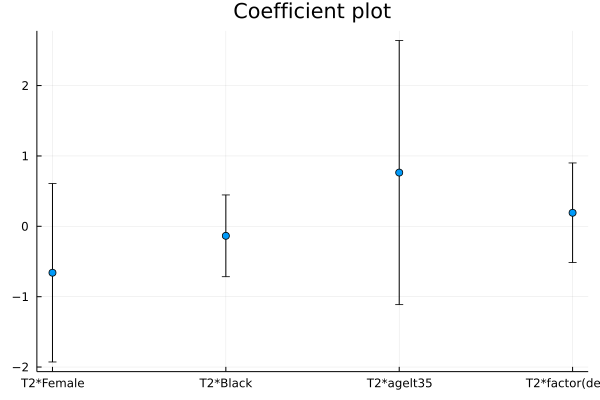

In [94]:
Plots.scatter(labels, coeff, legend = false, yerror = 1.96 .* std, title = "Coefficient plot")

In [98]:
coeff

4-element Vector{Float64}:
 -0.6597504681110732
 -0.1352653317271029
  0.7636024530674407
  0.1922491486807493

## Analyzing RCT: Polio and Pfizer/BNTX Covid-19 RCT

In [99]:
NT = 200745 #number of treated
NC = 201229 #number of controlled
YT = 33/NT  #average outcome for treated
YC =115/NC  #average outcome for controlled

0.0005714882049803955

In [111]:
print("Incidence per 100000 among treated: ", (YT*100000))

Incidence per 100000 among treated: 16.438765598146905

In [110]:
print( "Incidence per 100000 among controlled: ", (YC*100000))

Incidence per 100000 among controlled: 57.14882049803955

In [127]:
# treatment effect estimate reduction in incidence  per 100000 people
delta_hat = 100000*(YT-YC)
print("Estimate TE of occurances per 100,000 ", 100000*(YT-YC))

Estimate TE of occurances per 100,000 -40.71005489989265

In [128]:
# standard deviation
Var_delta_hat =  (100000^2)*(YT*(1-YT)/NT +  YC*(1-YC)/NC)
print("Standard deviation for ATE: ", Var_delta_hat^0.5)

Standard deviation for ATE: 6.047412320702958

In [130]:
# here we are using the fact that outcomes are Bernoulli 
CI_delta = [delta_hat-1.96*Var_delta_hat^0.5,delta_hat+1.96*Var_delta_hat^0.5]
print("95 % confidence interval is [", (CI_delta[1]), ",", CI_delta[2], "]")

95 % confidence interval is [-52.56298304847044,-28.85712675131485]

In [131]:
# Here we calculate the overall effectiveness of the vaccine and construct confidence intervals for it
NV =  200745
NU =  201229
RV = 33/NV
RU = 115/NU
VE = (RU - RV)/RU
print("Overall VE is ", VE)
# this recovers the number in the table.

Overall VE is 0.7123516206478694

In [132]:
# we set up a simulation example.
# calulate variance of risk estimates:
Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

2.8383662703286493e-9

In [146]:
# set-up MC draws:
B = 10000
RVs = RV.+randn(B)*(Var_RV)^0.5
RUs = RU.+randn(B)*(Var_RU)^0.5
VEs= (RUs.-RVs)./RUs

10000-element Vector{Float64}:
 0.6775162929147911
 0.8089900123978419
 0.7424226705737751
 0.7526583225523353
 0.7003726946418747
 0.7445492876834753
 0.6364101224182653
 0.6868293294577295
 0.7297656636087563
 0.7570102443103676
 0.8086758938518441
 0.770879760822537
 0.6303215543761541
 ⋮
 0.7187687493561323
 0.7188434950526382
 0.6569040478972137
 0.7048070216991129
 0.735648711185959
 0.7318727898179018
 0.732842041863388
 0.664640058709682
 0.7186790799568162
 0.6873520931155925
 0.824396656993993
 0.7083750101489036

In [148]:
CI_VE_L = quantile!(VEs, .025)
CI_VE_U = quantile!(VEs, .975)

print("95 % confidence interval is [",CI_VE_L,",",CI_VE_U,"]")

95 % confidence interval is [0.5831667402272738,0.8166230725971376]

In [153]:
X = VEs[:, [CartesianIndex()]]
X_plot = LinRange(0, 1, 1000)[:, [CartesianIndex()]]
# kde = KernelDensity(kernel='gaussian', bandwidth=0.02).fit(X)
# log_dens = kde.score_samples(X_plot)
# plt.fill_between(X_plot[:, 0], np.exp(log_dens))

1000×1 Matrix{Float64}:
 0.0
 0.001001001001001001
 0.002002002002002002
 0.003003003003003003
 0.004004004004004004
 0.005005005005005005
 0.006006006006006006
 0.007007007007007007
 0.008008008008008008
 0.009009009009009009
 0.01001001001001001
 0.011011011011011011
 0.012012012012012012
 ⋮
 0.988988988988989
 0.98998998998999
 0.990990990990991
 0.991991991991992
 0.992992992992993
 0.993993993993994
 0.994994994994995
 0.995995995995996
 0.996996996996997
 0.997997997997998
 0.998998998998999
 1.0

In [156]:
PlotlyJS.Plot(X)

data: [
  "scatter with fields type, x, and y"
]

layout: "layout with fields margin and template"

In [157]:
d = Normal(0, 1)

Normal{Float64}(μ=0.0, σ=1.0)